# Data Wrangling

Data Wrangling is the process of converting or mapping data from the initial "raw" format to a format that may be better for analysis. Data Wrangling is also known as Data Preprocessing or Data Cleaning.

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


### Import libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
filepath = 'D:\Program Files (x86)\Programming\Projects\IBM Data Analysis with Python\\automobile.csv'

In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [8]:
df = pd.read_csv(filepath, names=headers)

#To check the data, we'll use head() method
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identify and handle missing values

The first question that we will ask is, How to identify and deal with all the missing values?

#### Convert ? to NaN

In our automobile dataset, the missing data comes with a '?'. We will replace it with 'NaN' ,which is Python's default missing value marker, for convenience and computational reasons.

In [9]:
# replace ? with Nan

df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Evaluating for Missing Data

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [12]:
missing_values = df.isnull()
missing_values.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Counting missing values in each column

We can easily count the missing values in each column or variable using a for loop. True represents a missing value and False represents a value present in the data.

In [15]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


### Dealing with missing values

There are various ways to deal with missing values depending upon the requirement of the project

<b>How to deal with missing data?</b>

<ol>
    <li>Check the Data Source for more data</li>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
    <li>Leave the values in their present condition (Sometimes including missing values might lead to more insights)</li>
</ol>

The most of the entries in a column are null or missing, we can drop the entire column. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

<h4>Calculate and replace with the mean value for the "normalized-losses" column </h4>

In [21]:
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print("Average of normalizez losses: ", avg_norm_loss)

Average of normalizez losses:  122.0


In [22]:
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate and replace with the mean value for the "stroke" column </h4>

In [26]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print("Average of stroke: ", avg_stroke)

Average of stroke:  3.2554228855721337


In [29]:
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

<h4>Calculate and replace with the mean value for the "bore" column </h4>

In [31]:
avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore: ", avg_bore)

Average of bore:  3.3297512437810957


In [32]:
df['bore'].replace(np.nan, avg_bore, inplace=True)

<h4>Calculate and replace with the mean value for the "horsepower" column </h4>

In [34]:
avg_hp = df['horsepower'].astype('float').mean(axis=0)
print("Average of horsepower: ", avg_hp)

Average of horsepower:  104.25615763546799


In [36]:
df['horsepower'].replace(np.nan, avg_hp, inplace=True)

<h4>Calculate and replace with the mean value for the "peak-rpm" column </h4>

In [37]:
avg_rpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm: ", avg_rpm)

Average peak rpm:  5125.369458128079


In [39]:
df['peak-rpm'].replace(np.nan, avg_rpm, inplace=True)

#### Replacing missing values in num-of-doors

In [42]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [44]:
#replace missing values with four as it is the most frequent value
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

The empty rows in price column will be dropped as price is our target variable 

In [45]:
df.dropna(subset=['price'], axis=0, inplace=True)

# reset index, because we dropped two rows
df.reset_index(drop=True, inplace=True)

In [46]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now, we have a dataset with no missing values.

## Data Formatting

In [48]:
#Listing the datatypes of all columns

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


In [49]:
df[['bore','stroke']] = df[['bore','stroke']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')
df[['price']] = df[['price']].astype('float')
df[['peak-rpm']] = df[['peak-rpm']].astype('float')

In [50]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.

## Data Standardization

Data is usually collected from multiple sources and may have multiple formats. Data Standardization is the process of bringing all the data to a common format or standard to make meaningful comparisons. 

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to transform mpg into L/100km.</p>

<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg

In [51]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [52]:
#Converting mpg to L/100km

df['city-L/100km'] = 235/df['city-mpg']

In [53]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [55]:
df['highway-mpg'] = 235/df['highway-mpg']

df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

## Data Normalization

Normalization is the process of transforming or bringing values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" into a common range.</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [56]:
#Using simple feature scaling, replace original value with original value/maximum value

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

## Binning

Binning is a process of grouping values into bins i.e converting numeric variables into categorical variables.


<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? To do so we will ar arrange the values into three bins </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>

In [57]:
#Converting data into true format

df["horsepower"] = df["horsepower"].astype(int, copy=True)

Let's plot the histogram of horsepower to check what the distribution of horsepower looks like.


Text(0.5, 1.0, 'horsepower bins')

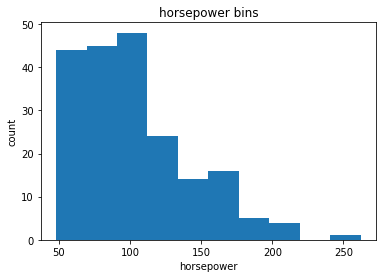

In [60]:
%matplotlib inline

plt.hist(df['horsepower'])

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

To generate 3 bins of equal size, we'll use numpy's linspace function.

In [61]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [62]:
group_names = ['Low','Medium','High']

In [63]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest = True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [64]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower binned')

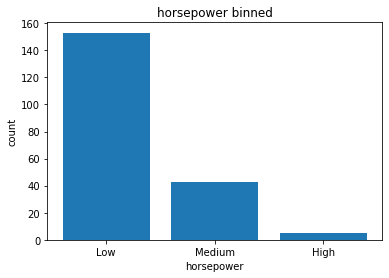

In [65]:
%matplotlib inline

plt.bar(group_names, df['horsepower-binned'].value_counts())

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower binned')

We have narrowed down the intervals from 57 to 3.

## Indicator Variables (Dummy Variables)

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. By using dummy variables, we can use categorical variables for regression analysis.

<b> Fuel Type Example </b>

We can see that the 'fuel-type' variable has two values, diesel and gas. Our Regression model cannot understand words, it speaks the language of numbers. To use this variable in the model, we will have to make indicator variables for 'fuel-type'

In [68]:
dummy_variables = pd.get_dummies(df['fuel-type'])
dummy_variables.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [69]:
dummy_variables.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'},inplace=True)

In [71]:
#Concatenate dummy variable
df = pd.concat([df, dummy_variables],axis=1)

#Drop the original fuel type
df.drop('fuel-type', axis=1 ,inplace=True)

In [73]:
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27.0,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27.0,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26.0,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30.0,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22.0,17450.0,13.055556,Low,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,25.0,15250.0,12.368421,Low,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19,25.0,17710.0,12.368421,Low,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19,25.0,18920.0,12.368421,Low,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140,5500.0,17,20.0,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101,5800.0,23,29.0,16430.0,10.217391,Low,0,1


<b> Aspiration Example </b>

We have two types of aspiration, turbo and standard. We will now create indicator variables for these types to use them in regression analysis.

In [76]:
dummy_variables_1 = pd.get_dummies(df['aspiration'])
dummy_variables_1.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [78]:
dummy_variables_1.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'}, inplace=True)

In [81]:
#Concatenate with original dataframe
df = pd.concat([df,dummy_variables_1], axis=1)

#Drop the original aspiration column
df.drop('aspiration', axis=1, inplace=True)

In [82]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27.0,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27.0,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26.0,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30.0,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22.0,17450.0,13.055556,Low,0,1,1,0


Finally, save the new and cleaned csv file

In [83]:
df.to_csv('cleaned_automobile.csv')